# Project Description

We used a credit card fraud dataset (https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) for building SVM and Decision Tree model. This dataset came with already standardized data due to privacy with PCA. Features include 28 features through PCA plus 2 features for time and amount.

Authors: Greg Bayne, Chris Lippold, Michael Booser


#Imports

In [ ]:
import numpy as np
import pandas as pd
import sklearn.preprocessing as pp
import matplotlib.pyplot as plt
from sklearn.cluster import Birch
from time import time
import sklearn.model_selection as ms
from sklearn.metrics import rand_score
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics
import seaborn
from sklearn.preprocessing import StandardScaler

#Loading and Investigating creditcard.csv Dataset

Attribute Explanation:

In [ ]:
raw_data = pd.read_csv('creditcard.csv', sep=',')
#Drop Incomplete data, and fields not useful for clustering (categorical features)
#data = raw_data.drop(columns=['address', 'year', 'day', 'neighbors'])
data = raw_data.dropna(axis=0, how='any')
data.shape
x = data.drop("Class", axis=1)
y = data.drop(['Time', 'V1', 'V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17',
               'V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount'],axis=1)

In [ ]:
#print(x.info)
print(y.info)

<bound method DataFrame.info of         Class
0           0
1           0
2           0
3           0
4           0
...       ...
284802      0
284803      0
284804      0
284805      0
284806      0

[284807 rows x 1 columns]>


In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#Preprocessing

**Do Preprocessing here**

##Defined Functions

The following functions are defined so that we may:

1. Increase Reusable code
2. Benchmark runtimes for the BIRCH algorithm

In [ ]:
scaler = StandardScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data=data)
sample = data.sample(n=25000, random_state=42)
sample

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
43428,-1.122574,-8.437520,5.198899,-12.299967,6.713625,-9.993751,-2.126001,-13.500776,6.294084,-7.743333,...,1.621105,-1.553906,-3.776994,1.111972,-2.711992,-0.959638,-5.001031,-3.159221,1.102834,24.039052
49906,-1.064538,0.173489,-1.661561,-0.088422,-0.978715,-1.051563,0.762524,-0.423881,0.187600,0.818971,...,-0.290578,-1.298780,-0.843641,-1.910343,0.597015,-1.548333,0.101567,0.309128,1.726255,-0.041599
29474,-1.249364,0.714553,-0.357718,0.111208,-0.727435,-0.391095,0.030357,-0.576002,0.001925,-0.884508,...,0.139407,0.231872,-0.266853,-1.337827,0.968934,-0.481807,0.028265,0.014039,-0.229289,-0.041599
276481,1.522680,-0.220592,0.997935,-1.100978,-0.246848,0.569308,-0.473363,0.223904,0.490664,-0.441200,...,0.488660,1.203890,-0.286074,-0.028351,-0.397853,-0.327142,-0.588125,0.005860,-0.347232,-0.041599
278846,1.551109,1.028319,-0.083203,-0.669967,0.231144,-0.131991,-0.718001,0.034954,-0.134589,0.330631,...,-0.324896,-0.849387,0.555752,0.101645,-0.690987,0.362340,-0.193353,-0.213796,-0.349671,-0.041599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95471,-0.620995,-0.285878,0.062448,0.210995,-0.687330,0.888631,-0.958523,0.894247,-0.330695,-0.515264,...,0.218251,0.714534,0.244634,0.169270,-1.575649,1.473101,0.367746,0.149432,-0.122100,-0.041599
22027,-1.322898,0.458652,-0.508363,0.717259,0.161618,-0.881690,0.232942,-0.582526,0.275445,0.911691,...,-0.110384,-0.346827,0.051660,0.476046,-0.103070,1.933858,-0.111891,0.062589,0.119664,-0.041599
115639,-0.439434,0.705159,-0.777461,0.166106,-0.894838,-0.908337,-0.127338,-0.699590,-0.159001,-1.439133,...,-0.592932,-1.161554,-0.137303,-0.736856,0.869407,-0.607363,0.092840,0.097506,0.046579,-0.041599
199293,0.801847,-0.611533,-0.477165,0.099550,-0.583660,1.662015,-1.795232,0.244913,-0.190604,0.051338,...,0.158050,-0.035482,0.336855,-0.030914,-0.930823,-0.628902,0.244808,0.707013,-0.353229,-0.041599


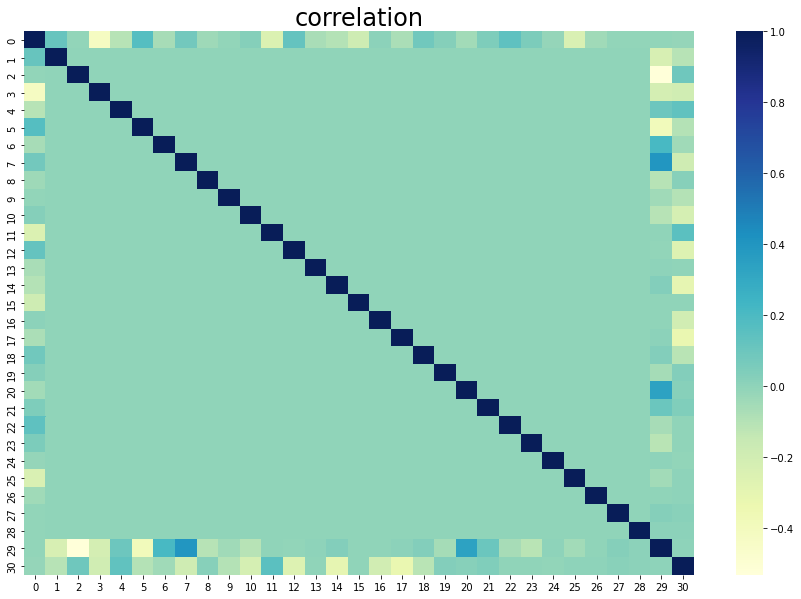

In [ ]:
corr = data.corr()

plt.figure(figsize=(15,10))
seaborn.heatmap(corr, cmap="YlGnBu") # Displaying the Heatmap
seaborn.set(font_scale=2,style='white')

plt.title('correlation')
plt.show()

In [ ]:
rank = corr[30]
rankDataFrame = pd.DataFrame(rank) 
rankDataFrame = np.abs(rankDataFrame).sort_values(by=30,ascending=False)
rank.dropna(inplace=False)
rankDataFrame.head(10)

,30
30,1.000000
17,0.326481
14,0.302544
12,0.260593
10,0.216883
16,0.196539
3,0.192961
7,0.187257
11,0.154876
4,0.133447


In [ ]:
#We will use the first 2 features with the greatest correlation to class

#Benchmarking

After uploading the dataset and assigning non-y features to variable 'x', We can use the *standardize(data)* function to normalize the data and then call the *runBIRCH(data)* function to find the runtime. These will be compared to future runtimes when testing approaches with "optimized" hyperparameters.

**Current Hyperparameter Values:**
1. Cluster Count    =  3
2. Threshhold       =  0.5
3. Branching Factor = 50

**Attention:** *When benchmarking, run this cell after all previous code is executed. If we are not benchmarking with the above hyperparameter values, we should skip this cell and standardized later on. Just to be safe :) -greg*

In [ ]:
def bench(estimator,data):
  initial_time = time()
  estimator.fit_transform(data)
  totalTime = time() - initial_time
  sil = metrics.silhouette_score(data, estimator.labels_, metric='euclidean', sample_size=500)
  result = {'time': [totalTime], 'silhouette score': [sil]}
  dfResults = pd.DataFrame(data=result)
  return dfResults

# Standard Birch Implementation

In [ ]:
standardBirch = Birch()
birchBench = bench(estimator=standardBirch, data=sample)
birchBench

,time,silhouette score
0,33.224304,0.095258


# A-BIRCH Implementation

A-BIRCH (Automatic BIRCH) is an approach by (source) in which we can automatically estimate the ***Threshhold*** hyperparameter. This serves three primary purposes:
1. Attempt to automatically find 1 of 3 key hyperparameter values, which would otherwise be selected manually
2. Remove the final clustering step, also removing the necessity of the ***cluster count*** hyperparameter
3. Hasten the runtime for the BIRCH algortihm

Note: Successful implementation would suggest the only other hyperparameter to contend with is that of the ***branching factor.***

Purpose: Too high of a threshold results in a higher chance of cluster combining, while too low of a threshold results in a higher chance of cluster splitting. Thus, finding an optimal threshold is important.

"Datasets with a large ratio of cluster distance (the distance between the cluster centers) to cluster radius are less likely to produce such errors (Fig. 1C)." -paper

The researchers provided the equations for evaluating threshhold. They formulated 2 equations, which often contain >1% error (very nice!). 

Formulated equation:

**T = 0.2Dmin + 0.8Rmax, if Dmin >= 6.0 x Rmax**

However, we can estimate a threshhold with an error under 1%

T = (1/(0.3 x wrmax + 4.5)) x Dmin + 0.8 x Rmax

so **T = (Dmin/0.3wrmax + 4.5) + 0.8Rmax.**

**(Note: Wr (weight ratio) is 8.8 x D - 42.1)**

Neglecting extreme cases, we can observe this trend with:

**T = 2 x Rmax**

This is assuming: Dmin > 6.0 x Rmax && wr <=10. This is not completely necessary, but will ensure low error. (We can try to check these conditions if possible, if they are not met we can still run with the value preceded by a warning of possible error)

source: "If the minimal cluster distance is greater than six times the maximum radius and the weight ratio of neighboring clusters is not greater than ten, a threshold  is a decent choice, with error probability smaller than one percent."


Step 1: find Cluster distance and radius values

Step 2: generate Threshold with data from previous step

Step 3: Use generated threshold on BIRCH

##Finding Cluster Radius using K-means

### Estimating cluster count

In order to sufficently find cluster radius, ideally we must have previous knowledge of the dataset. This is not always possible, so we must find a cost-effective method, since high cost is counterintuitive to using BIRCH which is efficient on large datasets. 

Finding cluster count is also something we are attempting to avoid as a BIRCH hyperparameter, but we must at least make estimations for the data. Results may vary.

In [ ]:
# calculate a baseline for kMax
kMax = int((data.shape[0]//2)**0.5)
kMax

377

Unfortunately, we have a high number of 377 clusters.
We are assuming this is a large dataset, and an extremely high cluster count would not be useful to us. Thus, we can try to compromise using k = kMax/10 to provide a number of clusters that may be meaningful to us.

In [ ]:
kMax_comp = int(kMax/10)
kMax_comp

37

Complexity of finding optimal k using elbow method forces us to scale down with a sample of our dataset, in this case n = 500.

In [ ]:
#sample size of 500
k_sample_data = data.sample(n=500, random_state = 42)

In [ ]:
#should only run a few values, this may be sensitive but *could* try reducing features in future during preprocessing
# V14 and V17 provide the largest correlation, so we use V14 and V17 
new_data = k_sample_data[[13, 16]].values 

In [ ]:
# selecting optimal value of 'k' with elbow method
# wcss = within cluster sum of squares
wcss = {}

for k in range(2,kMax_comp+1):
  model = KMeans(n_clusters=k)
  model.fit(new_data)
  wcss[k] = model.inertia_


In [ ]:
# dictionary, datatype is eww
print(wcss)
print(type(wcss.keys()))

{2: 710.3918973415041, 3: 506.7844505039267, 4: 400.57109383819335, 5: 323.8165687840125, 6: 274.27212475856567, 7: 233.93229804393386, 8: 209.10208279803365, 9: 188.92382997779728, 10: 164.39887128422035, 11: 151.51557123674496, 12: 135.4060137518477, 13: 121.02206141200061, 14: 110.45182791320036, 15: 100.91608297797805, 16: 91.84045420466255, 17: 87.3487929974259, 18: 81.52151589286038, 19: 74.74992801626709, 20: 71.43011573710598, 21: 67.28842100707247, 22: 64.5100763640449, 23: 60.86761961644178, 24: 58.11993559070977, 25: 55.195768934300915, 26: 52.95432367746618, 27: 50.59874163643175, 28: 47.123842910593126, 29: 45.32921159861094, 30: 44.06517701844167, 31: 41.85993713146781, 32: 39.52487312682932, 33: 39.35039339414138, 34: 38.8390597306611, 35: 36.72975778044734, 36: 35.371920734736, 37: 33.613209338294546}
<class 'dict_keys'>


In [ ]:
#convert dictionary to plottable datatype
# k = key
# v = value
wcss_new_k = [(k) for k, v in wcss.items()]
wcss_new_v = [(v) for k, v in wcss.items()]

In [ ]:
print(wcss_new_k[0])
print(wcss_new_v[0])

2
710.3918973415041


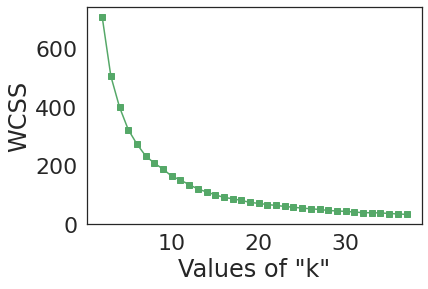

In [ ]:
# plotting the wcss values
# to find out the elbow value
plt.plot(wcss_new_k, wcss_new_v, 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('WCSS')
plt.show()

Looking at the Graph, our prefered cluster count will be one in which the line begins to bottom out. On the credit card dataset, we should use between 15-20 as our k for kmeans.

###Estimating Cluster Radius

In [ ]:
num_clusters = 20

In [ ]:
estimator = KMeans(n_clusters=num_clusters)
y_kmeans = estimator.fit(new_data)

In [ ]:
#find centroids
print(y_kmeans.labels_)
print(y_kmeans.cluster_centers_)
centroids = np.array(y_kmeans.cluster_centers_)
#print(centroids)

[ 5 10 16  4  3 11 14 18  6  0 17  0 12  9  1  4 18 16 13 14 14  1 12 12
 10  4  3 16  3 12  1 13  8 17 18 14 11  3  1 10 18  2  9  1  0  2 13  3
  4 11 12 11 12  2 13 14 11  0  9 13  9  3 18 11 10 18  9  9  9  9  2 17
 11 18 12  9 14  2 12  4 14 14  4  2  0  1 12 12  6 17  4 13  0  9  6  4
  4  3 13  4  2 12  1 11 10  4 14 12 17 13 13  4 13  3 16  0  9 10  6 13
  6 13  9 15 18  0  2  2 11 18 16  9  3 19 13 14  1 17  9  1  4 13  4 12
  1 13 13 12 15  4 13 10  1 12  4 12  9  9  4  4 18  3 11 17 15  9 11 13
  3  9  4 18  9 17  2 17 14  4 14  3 18  4  3 14 18  9 14 10  0  3 11 10
 18 12  6  9 17  9  2 13 14 12 16  2 14 13  9  4  0 12  3  4  2  3 14  4
 13  6 13  4  3 10 16 17 18  0  0  3 16  9  0 18 15 14 14  4 12  0 14  0
 10 15  1 15 15  9  1 14  7 15  3 18  2 10  2 13 18  4 13 14 14 14 18 16
  1  9 18  9 16  1  4 16 11  4 11  0 14  1  1  1  1 18 14 13  1 17 10  9
  0  0 12 16  4 12  7 13  9  9 11  9  3 18  4 11  3  4  0  6  3 10 18  2
 12 16  9  0 18 18  9  3 12 19  3  9  9 13  2 14  2

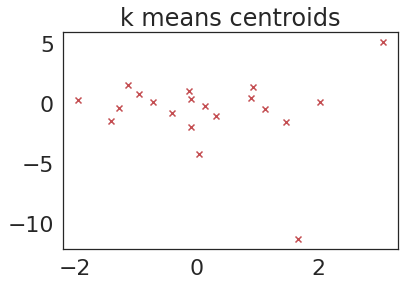

In [ ]:
plt.plot()
plt.title('k means centroids')

for i in range(num_clusters):
    plt.plot(centroids[i][0], centroids[i][1], ls='None')

plt.scatter(centroids[:,0], centroids[:,1],  marker="x", color='r')
plt.show()

In [ ]:
print(centroids[:][0])

[-0.13001916  1.09586891]


In [ ]:
#calculate distance between centroids

cluster_dist = cdist(XA=centroids,XB=centroids, metric='euclidean')
print (cluster_dist)




#take max distance divided by 2 **This makes 2 assumptions
#1. No overlap in clusters
#2. Clusters are perfect shape

[[ 0.          2.1417373   2.35576564  1.11716205  1.21595304 12.52448038
   2.80295101  3.06666106  5.18024769  0.73458564  2.99618175  1.97366219
   1.84385214  1.95846607  1.26616589  1.09915669  1.10233363  1.82710236
   0.86916735  5.28225599]
 [ 2.1417373   0.          2.05733219  1.54484818  1.56348298 10.38821
   1.77142188  1.27179484  6.75567554  1.42192842  0.98824336  2.62232486
   0.77387303  1.01255853  0.87563119  2.9308517   2.49230664  1.72471618
   2.20112571  3.19716646]
 [ 2.35576564  2.05733219  0.          2.74549859  1.16544474 11.44864438
   3.76627972  1.74868809  5.13199333  2.13240444  2.942637    3.97686364
   2.58568933  1.0465226   1.90589101  3.45488092  1.68291508  3.3329919
   3.04567041  4.76472677]
 [ 1.11716205  1.54484818  2.74549859  0.          1.64903715 11.69296033
   1.69203001  2.75599143  6.29192322  0.66008382  2.14199426  1.24020382
   0.92781435  1.93231771  0.90814444  1.46166607  2.07803828  0.73028019
   0.69437767  4.39637537]
 [ 1.215

In [ ]:
cluster_dist[0]

array([ 0.        ,  2.1417373 ,  2.35576564,  1.11716205,  1.21595304,
       12.52448038,  2.80295101,  3.06666106,  5.18024769,  0.73458564,
        2.99618175,  1.97366219,  1.84385214,  1.95846607,  1.26616589,
        1.09915669,  1.10233363,  1.82710236,  0.86916735,  5.28225599])

In [ ]:
#find max distance between each centroid
max_sum = 0

for i in range(num_clusters):
  max_sum += max(cluster_dist[i])

print("Max Sums: ", max_sum)
max_avg = max_sum/num_clusters

#average max distances
print("Max Average Distance: ", max_avg)


Max Sums:  236.97636349244368
Max Average Distance:  11.848818174622185


Estimating Rmax = Max radius of a cluster

This makes 2 greedy assumptions
1. No overlap in clusters
2. Clusters are perfect shape


In [ ]:
#divide by 2
estimated_max_radius = max_avg/2
print("Estimated Rmax: ", estimated_max_radius)

#This makes 2 assumptions
#1. No overlap in clusters
#2. Clusters are perfect shape

Estimated Rmax:  5.924409087311092


Estimating Dmin = Minimum distance between 2 clusters

In [ ]:
#find min distance between each centroid
min_dist = 100 #arbitrary high number, cannot set to 0

for i in range(num_clusters-1):
  temp = cluster_dist[i]
  temp = np.delete(temp,[i])
#  print(temp)
#  print(temp.dtype)
#  print("Min Distance @ ",i,": ", min_dist)
  if min_dist > min(temp[i:]):
    min_dist = min(temp[i:])

print("Min Distance: ", min_dist)

Min Distance:  0.5560620481113522


Calculating Weight Ratio

In [ ]:
def calc_WR(distance):
  weight_ratio = 8.8 * distance - 42.1
  return weight_ratio

In [ ]:
# function to calculate Threshold
# inputs will be Rmax, Dmin. Weight ratio wr will be called if needed
# i am implementing both functions so we can compare later with real R and D values


# LE = low error (>1%) ---> preferred solution
def calc_Opt_Thresh_LE(radius, distance):
  thresh = 2 * radius
  if (distance >= 6*radius):
    return thresh
  else:
    print("Conditional Dmin >= 6*Rmax is not met. Results may have errors!")
  return thresh

def calc_Opt_Thresh(radius, distance):
  wr = calc_WR(distance)
  thresh = (distance / (.3 * wr + 4.5)) + (.8 * radius)
  return thresh


In [ ]:
if(min_dist >= 6*estimated_max_radius):
  modBirch = Birch(n_clusters=num_clusters, threshold=calc_Opt_Thresh_LE(radius=estimated_max_radius, distance=min_dist))
else:
  modBirch = Birch(n_clusters=num_clusters, threshold=calc_Opt_Thresh(radius=estimated_max_radius,distance=min_dist))
modBirchBench = bench(estimator=modBirch, data=sample)


#Results

In [ ]:
results = pd.concat([birchBench, modBirchBench], keys=['Standard Birch', 'A-Birch'])

In [ ]:
results

,,time,silhouette score
Standard Birch,0,33.224304,0.095258
A-Birch,0,1.166136,0.185213


Results show the algorithm improved overall silhouette score by 2 to 5 times and time by 19 times which is a considerable amount for a sample size of 25,000.

#Conclusion

Through our results we were successful in improving both time of the algorithm and the silhouette score. However, upon experimenting with this data, google colab doesn't have the approriate memory to support the dataset. If a dataset has roughly or more than 25,000 instances it might be vital to parallelize this algorithm to account for the memory bottleneck that it suffers from.